In [2]:
import matplotlib.pyplot as plt
import datajoint as dj
import numpy as np

import seaborn as sns
import pandas as pd
import blob_transformation as bt
from DMS2_utils import *

# settings
%load_ext autoreload
%autoreload 2
dj.blob.use_32bit_dims = True # necessary for pd.blob read
sns.set_context("talk")



[2023-04-17 08:46:27,789][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2023-04-17 08:46:28,033][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [3]:
bdata = dj.create_virtual_module("bdata", "bdata")
ANIMAL_ID = "R501"
SESSION = 912232

In [4]:
key = {'sessid': SESSION}

protocol_data_blob = (bdata.Sessions & key).fetch('protocol_data', as_dict=True)

type(protocol_data_blob[0]['protocol_data'])

datajoint.blob.MatStruct

In [7]:

protocol_data_dict = bt.transform_blob(protocol_data_blob[0]['protocol_data'])

len(protocol_data_dict)

53

In [9]:
protocol_df = bt.blob_dict_to_df(protocol_data_dict)
protocol_df.insert(0, "trial", np.arange(1, len(protocol_df)+1, dtype=int))
protocol_df.insert(1, "animal_id", [ANIMAL_ID] * len(protocol_df))
protocol_df.insert(2, "date", [pd.Timestamp(2023,4,16)] * len(protocol_df))
protocol_df.insert(3, "sess_id", [SESSION] * len(protocol_df))
protocol_df[["sa", "sb"]] = protocol_df[["sa", "sb"]].apply(lambda row: row / 1000)

protocol_df["sound_pair"] = protocol_df.apply(
    lambda row: str(row.sa) + ", " + str(row.sb), axis=1
)
protocol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   trial                 209 non-null    int32         
 1   animal_id             209 non-null    object        
 2   date                  209 non-null    datetime64[ns]
 3   sess_id               209 non-null    int64         
 4   result                209 non-null    float64       
 5   hits                  209 non-null    float64       
 6   violations            209 non-null    float64       
 7   temperror             209 non-null    float64       
 8   hit_rate              209 non-null    float64       
 9   error_rate            209 non-null    float64       
 10  violation_rate        209 non-null    float64       
 11  temp_error_rate       209 non-null    float64       
 12  n_lpokes              208 non-null    float64       
 13  n_cpokes            

In [10]:
ANIMAL_ID = "I003"
SESSION = 912274
key = {'sessid': SESSION}

protocol_data_blob2 = (bdata.Sessions & key).fetch('protocol_data', as_dict=True)

protocol_data_dict2 = bt.transform_blob(protocol_data_blob2[0]['protocol_data'])

len(protocol_data_dict2)

56

In [15]:
protocol_df2 = bt.blob_dict_to_df(protocol_data_dict2)
protocol_df2.insert(0, "trial", np.arange(1, len(protocol_df2)+1, dtype=int))
protocol_df2.insert(1, "animal_id", ["R501"] * len(protocol_df2))
protocol_df2.insert(2, "date", [pd.Timestamp(2023,4,16)] * len(protocol_df2))
protocol_df2.insert(3, "sess_id", [SESSION] * len(protocol_df2))
protocol_df2[["sa", "sb"]] = protocol_df2[["sa", "sb"]].apply(lambda row: row)

protocol_df2["sound_pair"] = protocol_df2.apply(
    lambda row: str(row.sa) + ", " + str(row.sb), axis=1
)

In [16]:
protocol_df2.head()

,trial,animal_id,date,sess_id,result,hits,violations,temperror,hit_rate,error_rate,...,l_water_vol,r_water_vol,ab_l_prob,ab_r_prob,ab_beta,ab_tau,exp_del_tau,exp_del_min,exp_del_max,sound_pair
0,1,R501,2023-04-16,912274,4.0,0.0,0.0,1.0,0.00,0.0,...,24.0,24.0,0.5,0.5,0.0,30.0,0.3,0.2,0.7,"3.0, 3.0"
1,2,R501,2023-04-16,912274,1.0,1.0,0.0,0.0,0.00,0.0,...,24.0,24.0,0.5,0.5,0.0,30.0,0.3,0.2,0.7,"12.0, 12.0"
2,3,R501,2023-04-16,912274,1.0,1.0,0.0,0.0,0.50,0.0,...,24.0,24.0,0.5,0.5,0.0,30.0,0.3,0.2,0.7,"3.0, 12.0"
3,4,R501,2023-04-16,912274,1.0,1.0,0.0,0.0,0.67,0.0,...,24.0,24.0,0.5,0.5,0.0,30.0,0.3,0.2,0.7,"3.0, 12.0"
4,5,R501,2023-04-16,912274,4.0,0.0,0.0,1.0,0.75,0.0,...,24.0,24.0,0.5,0.5,0.0,30.0,0.3,0.2,0.7,"12.0, 12.0"


In [20]:
pd.concat([protocol_df, protocol_df2]).reset_index(drop=True)

,trial,animal_id,date,sess_id,result,hits,violations,temperror,hit_rate,error_rate,...,l_water_vol,r_water_vol,ab_l_prob,ab_r_prob,ab_beta,ab_tau,sound_pair,exp_del_tau,exp_del_min,exp_del_max
0,1,R501,2023-04-16,912232,4.0,0.0,0.0,1.0,0.00,0.0,...,7.0,7.0,0.5,0.5,0.0,30.0,"0.012, 0.003",NaN,NaN,NaN
1,2,R501,2023-04-16,912232,4.0,0.0,0.0,1.0,0.00,0.0,...,7.0,7.0,0.5,0.5,0.0,30.0,"0.012, 0.012",NaN,NaN,NaN
2,3,R501,2023-04-16,912232,4.0,0.0,0.0,1.0,0.00,0.0,...,7.0,7.0,0.5,0.5,0.0,30.0,"0.003, 0.003",NaN,NaN,NaN
3,4,R501,2023-04-16,912232,4.0,0.0,0.0,1.0,0.00,0.0,...,7.0,7.0,0.5,0.5,0.0,30.0,"0.012, 0.012",NaN,NaN,NaN
4,5,R501,2023-04-16,912232,4.0,0.0,0.0,1.0,0.00,0.0,...,7.0,7.0,0.5,0.5,0.0,30.0,"0.003, 0.003",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,17,R501,2023-04-16,912274,1.0,1.0,0.0,0.0,0.69,0.0,...,24.0,24.0,0.5,0.5,0.0,30.0,"12.0, 3.0",0.3,0.2,0.7
226,18,R501,2023-04-16,912274,1.0,1.0,0.0,0.0,0.71,0.0,...,24.0,24.0,0.5,0.5,0.0,30.0,"3.0, 3.0",0.3,0.2,0.7
227,19,R501,2023-04-16,912274,6.0,NaN,NaN,NaN,0.72,0.0,...,24.0,24.0,0.5,0.5,0.0,30.0,"3.0, 3.0",0.3,0.2,0.7
228,20,R501,2023-04-16,912274,6.0,NaN,NaN,NaN,0.72,0.0,...,24.0,24.0,0.5,0.5,0.0,30.0,"3.0, 3.0",0.3,0.2,0.7


In [38]:
    # # convert data types (matlab makes everything a float)
    # int_columns = [
    #     "hits",
    #     "violations",
    #     "temperror",
    #     "result",
    #     "helper",
    #     "stage",
    #     "sess_id",
    # ]
    # protocol_df[int_columns] = protocol_df[int_columns].astype("Int64")

    # # let pandas know if it's a category (helps with plotting)
    # category_columns = ["result", "stage", "sess_id", "sound_pair"]
    # protocol_df[category_columns] = protocol_df[category_columns].astype("category")

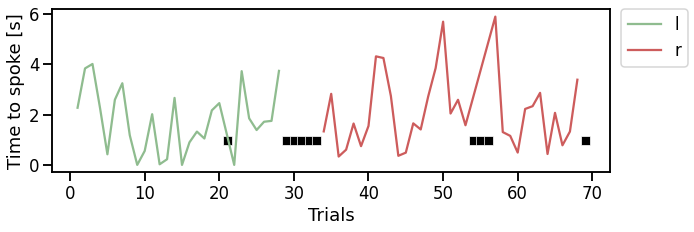

In [212]:
fig, ax = plt.subplots(figsize=(10,3))
title=""
protocol_df["was_no_answer"] = protocol_df["result"].apply(lambda row: True if row == 6.0 else np.nan)
#TODO what if len_first_spoke is only 1?
sns.lineplot(data=first_poke_df, x="trial", y="value", ax=ax, hue="first_spoke", palette=["darkseagreen", "indianred"])
sns.scatterplot(data=protocol_df, x="trial", y="was_no_answer",ax=ax, marker='s', color="black")
_ = ax.set(ylabel="Time to spoke [s]", xlabel="Trials", title=title)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

In [213]:
calculate_daily_trial_rate("R501", protocol_df.date[0])

[2023-04-13 13:22:52,907][WARNING]: MySQL server has gone away. Reconnecting to the server.


67.5

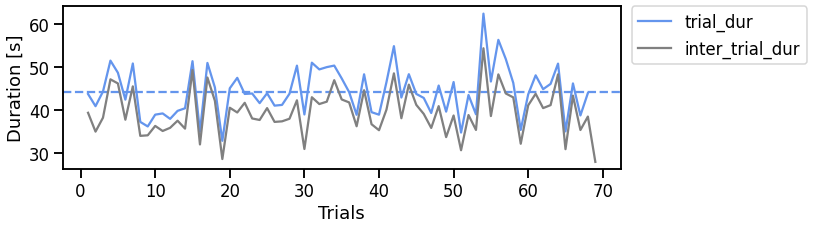

In [211]:
fig, ax = plt.subplots(figsize=(10,3))
plot_trial_and_iti_dur(protocol_df, ax)

In [85]:
pokes_df = pd.melt(protocol_df, id_vars=["trial"], value_vars=["n_lpokes", "n_cpokes", "n_rpokes"])

In [90]:
protocol_df.stage.unique()

array([1., 2.])

In [118]:
import matplotlib
gray_palette = sns.color_palette("hls")
for idx,s in enumerate(protocol_df.stage.unique()):
    bounds = protocol_df[['trial', 'stage']].groupby('stage').agg(['min', 'max']).loc[s]
    ax.axvspan(bounds.min(), bounds.max()+1, alpha=0.3, color=gray_palette[int(s)-1])

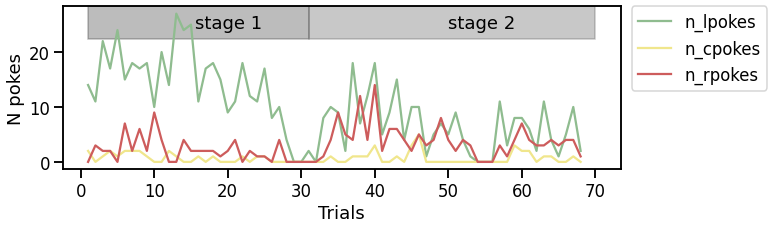

In [159]:
fig, ax = plt.subplots(figsize=(10,3))
plot_npokes_across_trials(protocol_df, ax)

In [ ]:
# maybe histogram next?